# CREDIT RISK

### Credit card default refers to a situation where a cardholder fails to make their minimum required payments for a certain period.Objective of our project is to predict which customer might default next month.

In [1]:
import pandas as pd 
import numpy as np

In [2]:
pd.set_option('display.max_columns',None)
df=pd.read_csv(r"C:\Users\ATHIRA S\Downloads\archive (27)\UCI_Credit_Card.csv")
df.head(20)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,0,0,367965.0,412023.0,445007.0,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,0,-1,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,0,0,11285.0,14096.0,12108.0,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,-1,-1,0.0,0.0,0.0,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [3]:
df.shape

(30000, 25)

### Variables


ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [5]:
col=df.columns
col

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [6]:
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

#### There is no missing values in this data

In [7]:
df[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


In [8]:
df[['PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [9]:
colu=['SEX', 'EDUCATION', 'MARRIAGE','PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for i in colu:
    print(f'{i}-------{df[i].unique()}')

SEX-------[2 1]
EDUCATION-------[2 1 3 5 4 6 0]
MARRIAGE-------[1 2 3 0]
PAY_0-------[ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_2-------[ 2  0 -1 -2  3  5  7  4  1  6  8]
PAY_3-------[-1  0  2 -2  3  4  6  7  1  5  8]
PAY_4-------[-1  0 -2  2  3  4  5  7  6  1  8]
PAY_5-------[-2  0 -1  2  3  5  4  7  8  6]
PAY_6-------[-2  2  0 -1  3  6  4  7  8  5]


In [10]:
df['EDUCATION']=df['EDUCATION'].replace([0,5,6],4)

In [11]:
df['MARRIAGE']=df['MARRIAGE'].replace(0,3)

In [12]:
df.rename(columns={'PAY_0':'PAY_1'},inplace=True)

In [13]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [14]:
pay=['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for i in pay:
    for x in [-1,-2]:
        df[i]=df[i].replace(x,0)

### EDA

In [15]:
df1=df.copy()

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

Default_percentage is 22.12


<AxesSubplot:ylabel='default.payment.next.month'>

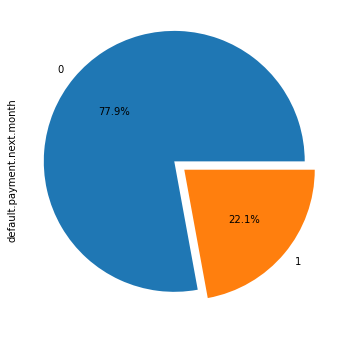

In [17]:
default_no=sum(df['default.payment.next.month'])
default_per=default_no/len(df1['default.payment.next.month'])*100
print(f'Default_percentage is {default_per}')
plt.figure(figsize=(10,6))
df1['default.payment.next.month'].value_counts().plot(kind='pie',explode=[0.1,0],autopct='%1.1f%%')


#### The data is quite imbalanced with about 22.1% of clients will default next month

<AxesSubplot:>

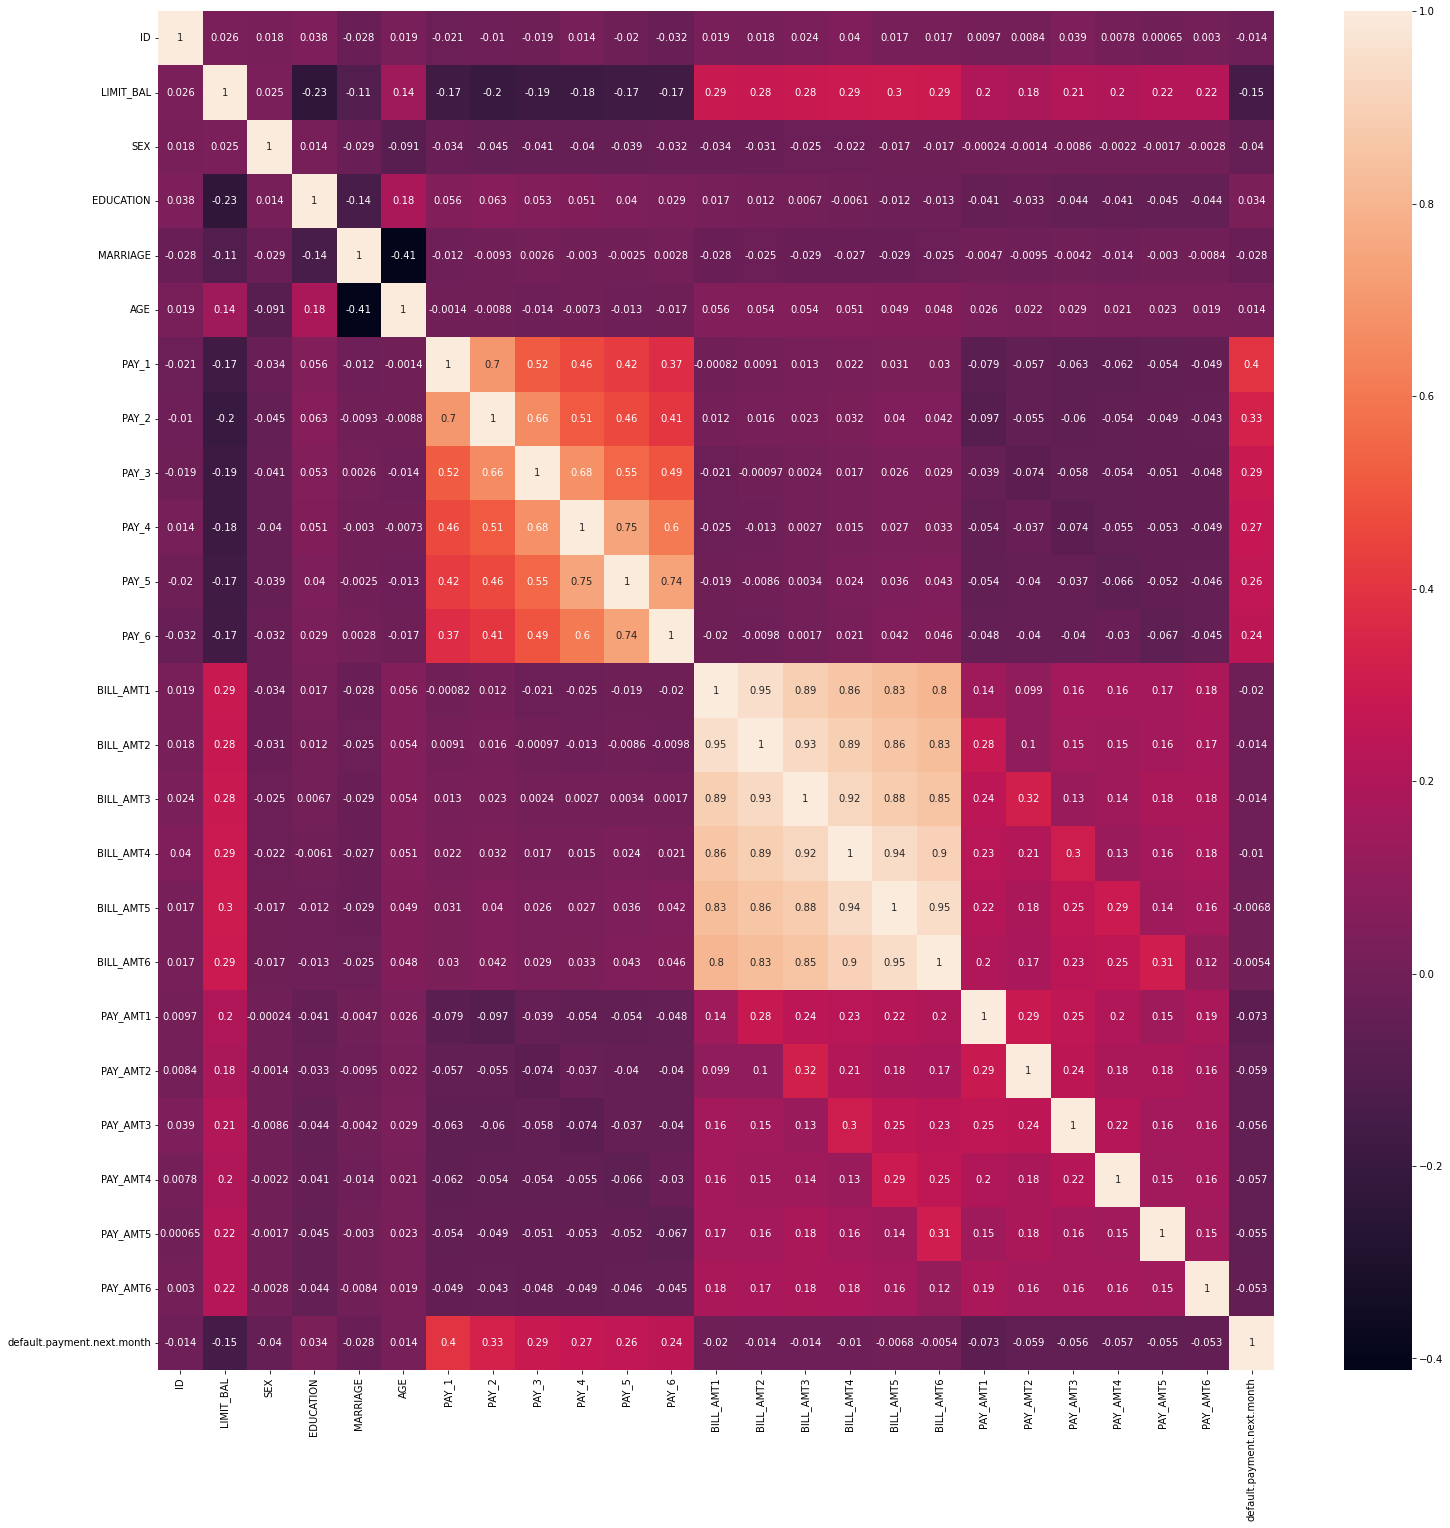

In [18]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True)

In [19]:
df1['SEX']=df1['SEX'].replace(1,'male')
df1['SEX']=df1['SEX'].replace(2,'female')
df1['default.payment.next.month']=df1['default.payment.next.month'].replace({1:'default', 0:'not default'})

female    18112
male      11888
Name: SEX, dtype: int64


Text(0.5, 1.0, 'MALE')

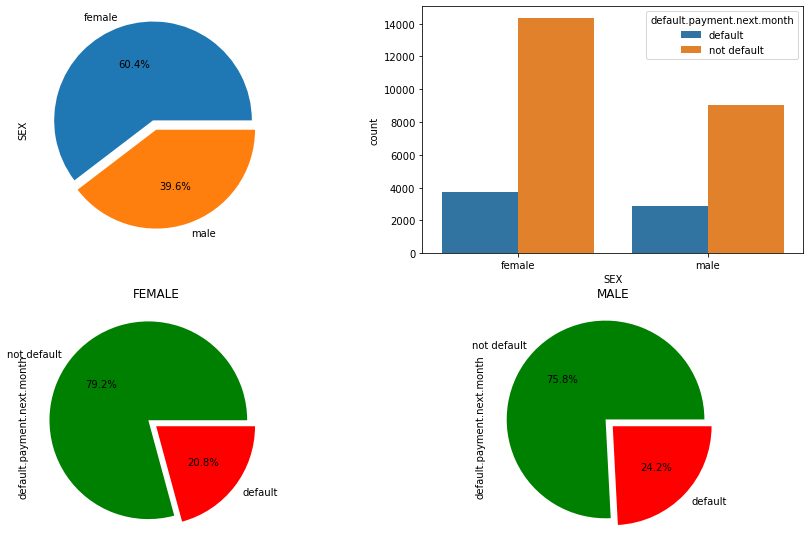

In [20]:
sex_count=df1['SEX'].value_counts()
print(sex_count)
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
df1['SEX'].value_counts().plot(kind='pie',explode=[0.1,0],autopct='%1.1f%%')

plt.subplot(2,2,2)
sns.countplot(x='SEX',hue='default.payment.next.month',data=df1)

plt.subplot(2,2,3)
df1[df1['SEX']=='female']['default.payment.next.month'].value_counts().plot(kind='pie',explode=[0.1,0],autopct='%1.1f%%',colors=['g','r'])
plt.title('FEMALE')
plt.subplot(2,2,4)
df1[df1['SEX']=='male']['default.payment.next.month'].value_counts().plot(kind='pie',explode=[0.1,0],autopct='%1.1f%%',colors=['g','r'])
plt.title('MALE')

#### - Female clients own credit card more than male clients
#### - Despite a smaller number of males in the dataset compared to females, males exhibit a higher likelihood of being defaulters.

In [21]:
df1['MARRIAGE']=df1['MARRIAGE'].replace({1:'married', 2:'single', 3:'others'})

single     15964
married    13659
others       377
Name: MARRIAGE, dtype: int64


<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

<Figure size 1080x1080 with 0 Axes>

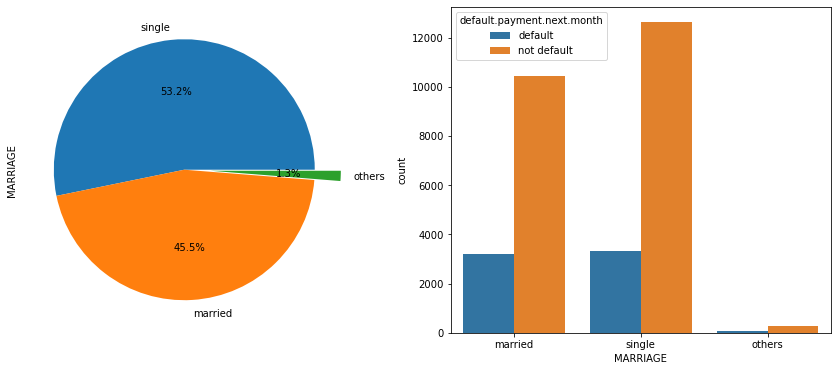

In [22]:
marriage_count=df1['MARRIAGE'].value_counts()
print(marriage_count)
plt.figure(figsize=(15,15))
fig,axes=plt.subplots(ncols=2,figsize=(15,6))
df1['MARRIAGE'].value_counts().plot(kind='pie',explode=[0,0,0.2],autopct='%1.1f%%',ax=axes[0],subplots=True)
sns.countplot(x='MARRIAGE',hue='default.payment.next.month',data=df1)

#### Most credit card users are singles and comparitively married clients are more prone to default

In [23]:
df1['EDUCATION'] = df1['EDUCATION'].replace({1:'graduate school', 2:'university', 3:'high school', 4:'others'})


university         14030
graduate school    10585
high school         4917
others               468
Name: EDUCATION, dtype: int64


Text(0.5, 1.0, 'Defaulters')

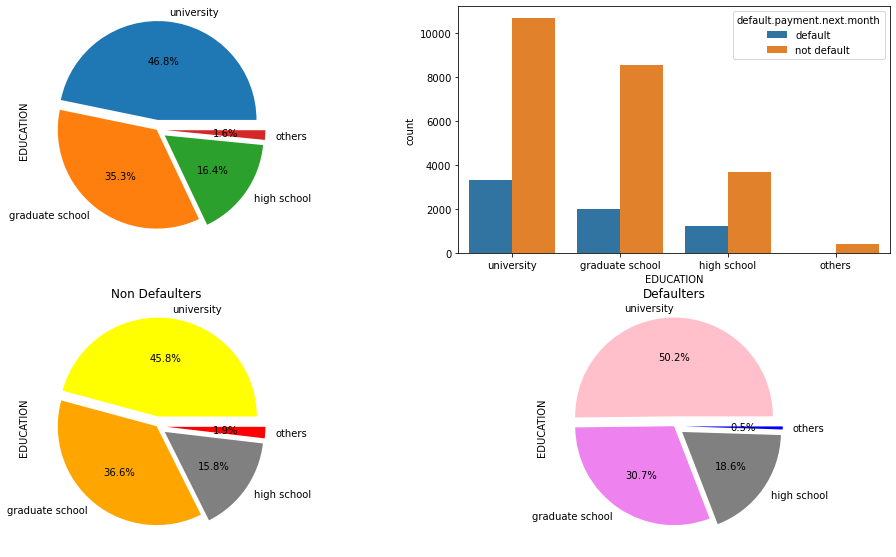

In [25]:
edu_count=df1['EDUCATION'].value_counts()
print(edu_count)
plt.figure(figsize=(17,10))
plt.subplot(2,2,1)
df1['EDUCATION'].value_counts().plot(kind='pie',explode=[0.1,0,0.1,0.1],autopct='%0.1f%%')
plt.subplot(2,2,2)
sns.countplot(x='EDUCATION',hue='default.payment.next.month',data=df1)

plt.subplot(2,2,3)
df1[df1['default.payment.next.month']=='not default']['EDUCATION'].value_counts().plot(kind='pie',explode=[0.1,0,0.1,0.1],autopct='%1.1f%%',colors=['yellow','orange','grey','red'])
plt.title('Non Defaulters')
plt.subplot(2,2,4)
df1[df1['default.payment.next.month']=='default']['EDUCATION'].value_counts().plot(kind='pie',explode=[0.1,0,0.1,0.1],autopct='%1.1f%%',colors=['pink','violet','grey','blue'])
plt.title('Defaulters')

#### - Users belonging to a higer educations are more inclined to use credit card
#### - University graduate demonstrate a higher chance of defaulting on thier credit card payments

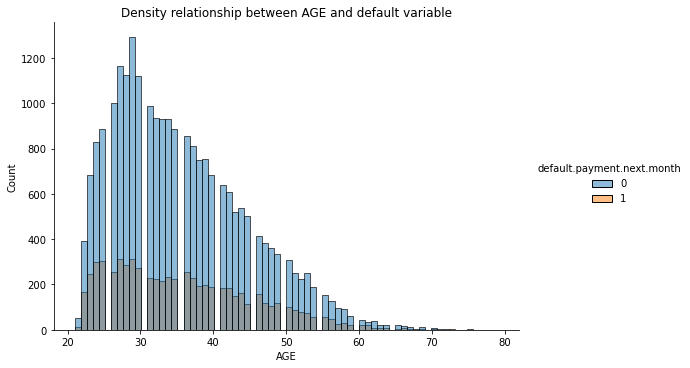

In [26]:
sns.displot(data = df, x = "AGE", hue = "default.payment.next.month", kind = "hist", height = 5, aspect = 1.5).set(title =  "Density relationship between AGE and default variable")

#### Histogram is right skewed meaning older customers are less likely to use credit card

In [116]:
age_count=df1['AGE'].value_counts().sort_index()
age_count

21      67
22     560
23     931
24    1127
25    1186
26    1256
27    1477
28    1409
29    1605
30    1395
31    1217
32    1158
33    1146
34    1162
35    1113
36    1108
37    1041
38     944
39     954
40     870
41     824
42     794
43     670
44     700
45     617
46     570
47     501
48     466
49     452
50     411
51     340
52     304
53     325
54     247
55     209
56     178
57     122
58     122
59      83
60      67
61      56
62      44
63      31
64      31
65      24
66      25
67      16
68       5
69      15
70      10
71       3
72       3
73       4
74       1
75       3
79       1
Name: AGE, dtype: int64

In [117]:
age_interval=pd.cut(age_count.index,bins=range(20,80,10),right=False)
interval_counts=age_count.groupby(age_interval).sum().reset_index()
interval_counts.columns=['Age interval','count']
interval_counts

,Age interval,count
0,"[20, 30)",9618
1,"[30, 40)",11238
2,"[40, 50)",6464
3,"[50, 60)",2341
4,"[60, 70)",314


In [118]:
df2=df[df['default.payment.next.month']==0]
age_0=df2['AGE'].value_counts().sort_index()
age_0_interval=pd.cut(age_0.index,bins=range(20,80,10),right=False)
interval_0_counts=age_0.groupby(age_0_interval).sum().reset_index()
interval_0_counts.columns=['Age interval','count']
interval_0_counts

,Age interval,count
0,"[20, 30)",7421
1,"[30, 40)",8962
2,"[40, 50)",4979
3,"[50, 60)",1759
4,"[60, 70)",225


In [119]:
df2=df[df['default.payment.next.month']==1]
age_1=df2['AGE'].value_counts().sort_index()
age_1_interval=pd.cut(age_1.index,bins=range(20,80,10),right=False)
interval_1_counts=age_1.groupby(age_1_interval).sum().reset_index()
interval_1_counts.columns=['Age interval','count']
interval_1_counts

,Age interval,count
0,"[20, 30)",2197
1,"[30, 40)",2276
2,"[40, 50)",1485
3,"[50, 60)",582
4,"[60, 70)",89


In [120]:
combined_df = pd.merge(interval_0_counts, interval_1_counts, on='Age interval', suffixes=('_0', '_1'))
combined_df

,Age interval,count_0,count_1
0,"[20, 30)",7421,2197
1,"[30, 40)",8962,2276
2,"[40, 50)",4979,1485
3,"[50, 60)",1759,582
4,"[60, 70)",225,89


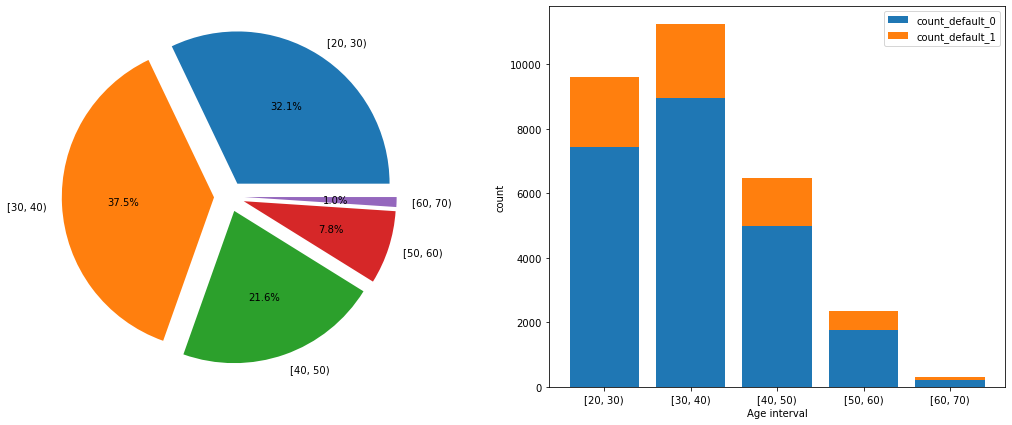

In [121]:
plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
plt.pie(x=interval_counts['count'],explode=[0.1,0.1,0.1,0.1,0.1],labels=interval_counts['Age interval'],autopct='%0.1f%%')

plt.subplot(1,2,2)
combined_df['Age interval'] = combined_df['Age interval'].astype(str)
plt.bar(combined_df['Age interval'], combined_df['count_0'], label='count_default_0')
plt.bar(combined_df['Age interval'], combined_df['count_1'], bottom=combined_df['count_0'], label='count_default_1')
plt.xlabel('Age interval')
plt.ylabel('count')
plt.legend(loc=1)

#### - The main credit card users are in their 30s
#### - Clients in their 20s and 30s are most likely to default in their payment

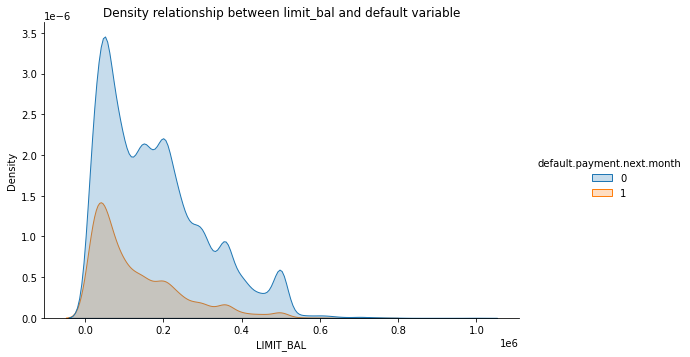

In [297]:
sns.displot(data = df, x = 'LIMIT_BAL', hue = "default.payment.next.month", kind = "kde",fill=True, height = 5, aspect = 1.5).set(title =  "Density relationship between limit_bal and default variable")

#### -    The majority of client possess a credit limit below 200000
#### -    Clients with smaller balance limit are prone to default

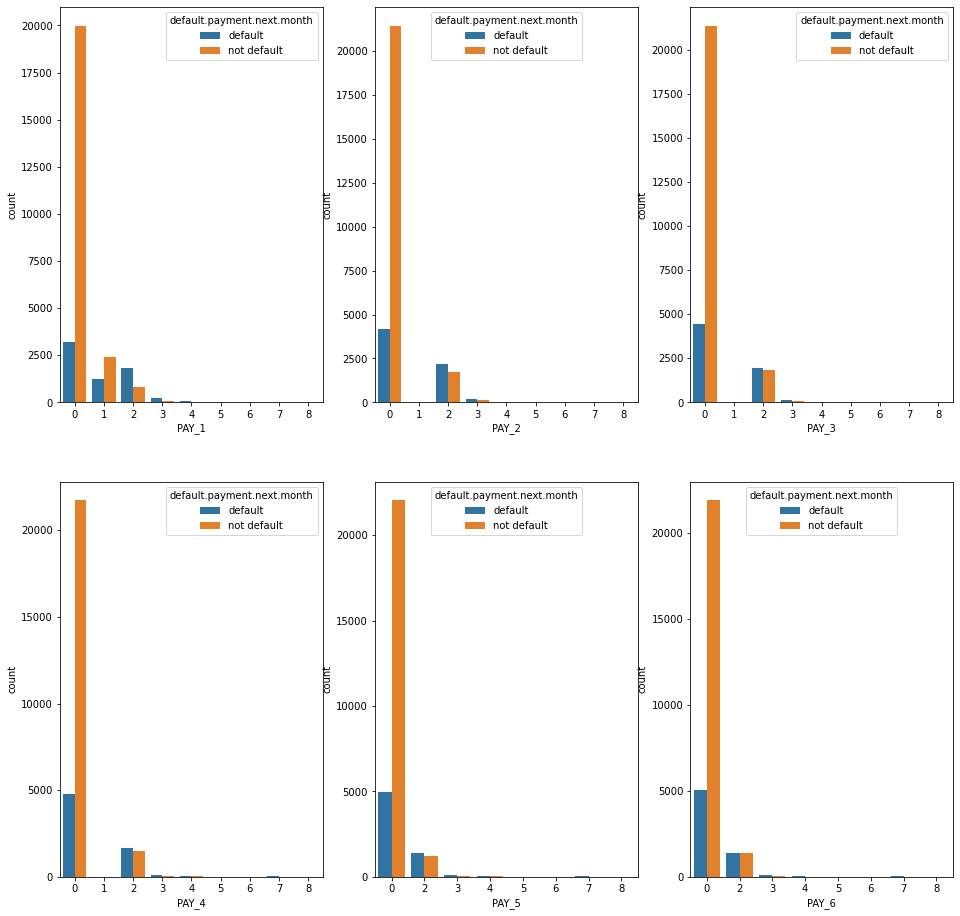

In [280]:

plt.figure(figsize=(16,16))
plt.subplot(2,3,1)
sns.countplot(x='PAY_1', hue='default.payment.next.month', data=df1)

plt.subplot(2,3,2)
sns.countplot(x='PAY_2', hue='default.payment.next.month', data=df1)

plt.subplot(2,3,3)
sns.countplot(x='PAY_3', hue='default.payment.next.month', data=df1)

plt.subplot(2,3,4)
sns.countplot(x='PAY_4', hue='default.payment.next.month', data=df1)

plt.subplot(2,3,5)
sns.countplot(x='PAY_5', hue='default.payment.next.month', data=df1)

plt.subplot(2,3,6)
sns.countplot(x='PAY_6',hue='default.payment.next.month', data=df1)
plt.show()

#### - Most of the people have made their payment on time for all the months.
#### - Highest no. of default happened when there is a payment delay of 2 months or more

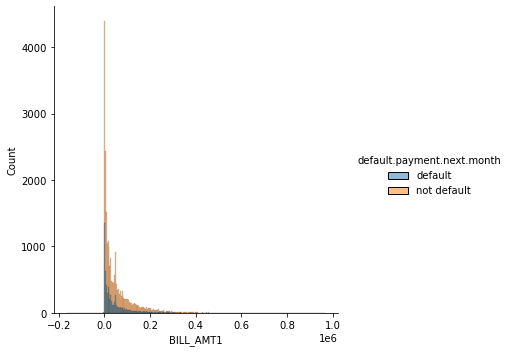

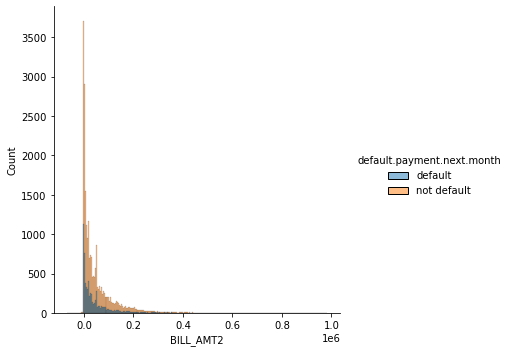

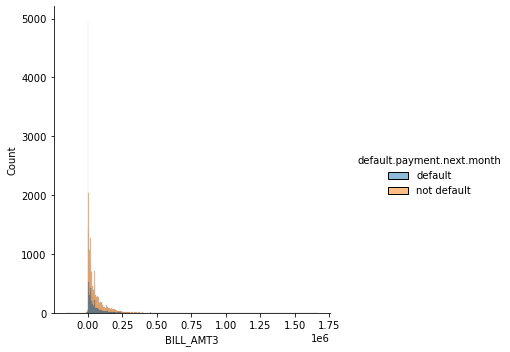

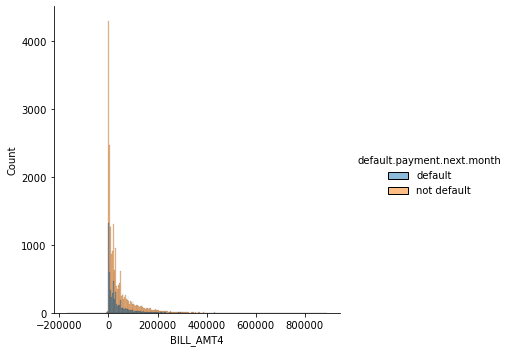

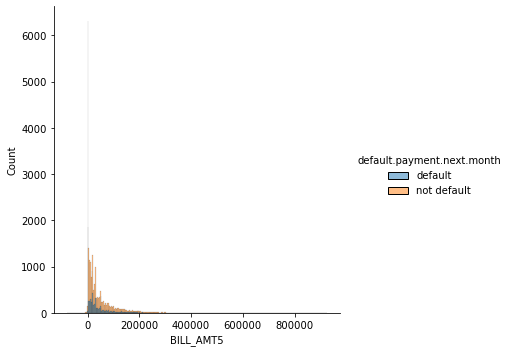

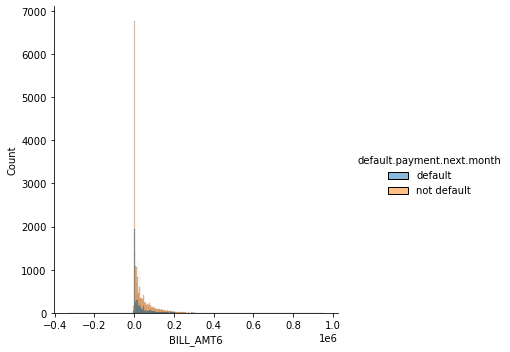

In [281]:
bills=['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
for bill in bills:
    sns.displot(data=df1,x=bill,hue='default.payment.next.month')

#### - Highest number of defaults happened for smaller bill statements

<Figure size 1800x1800 with 0 Axes>

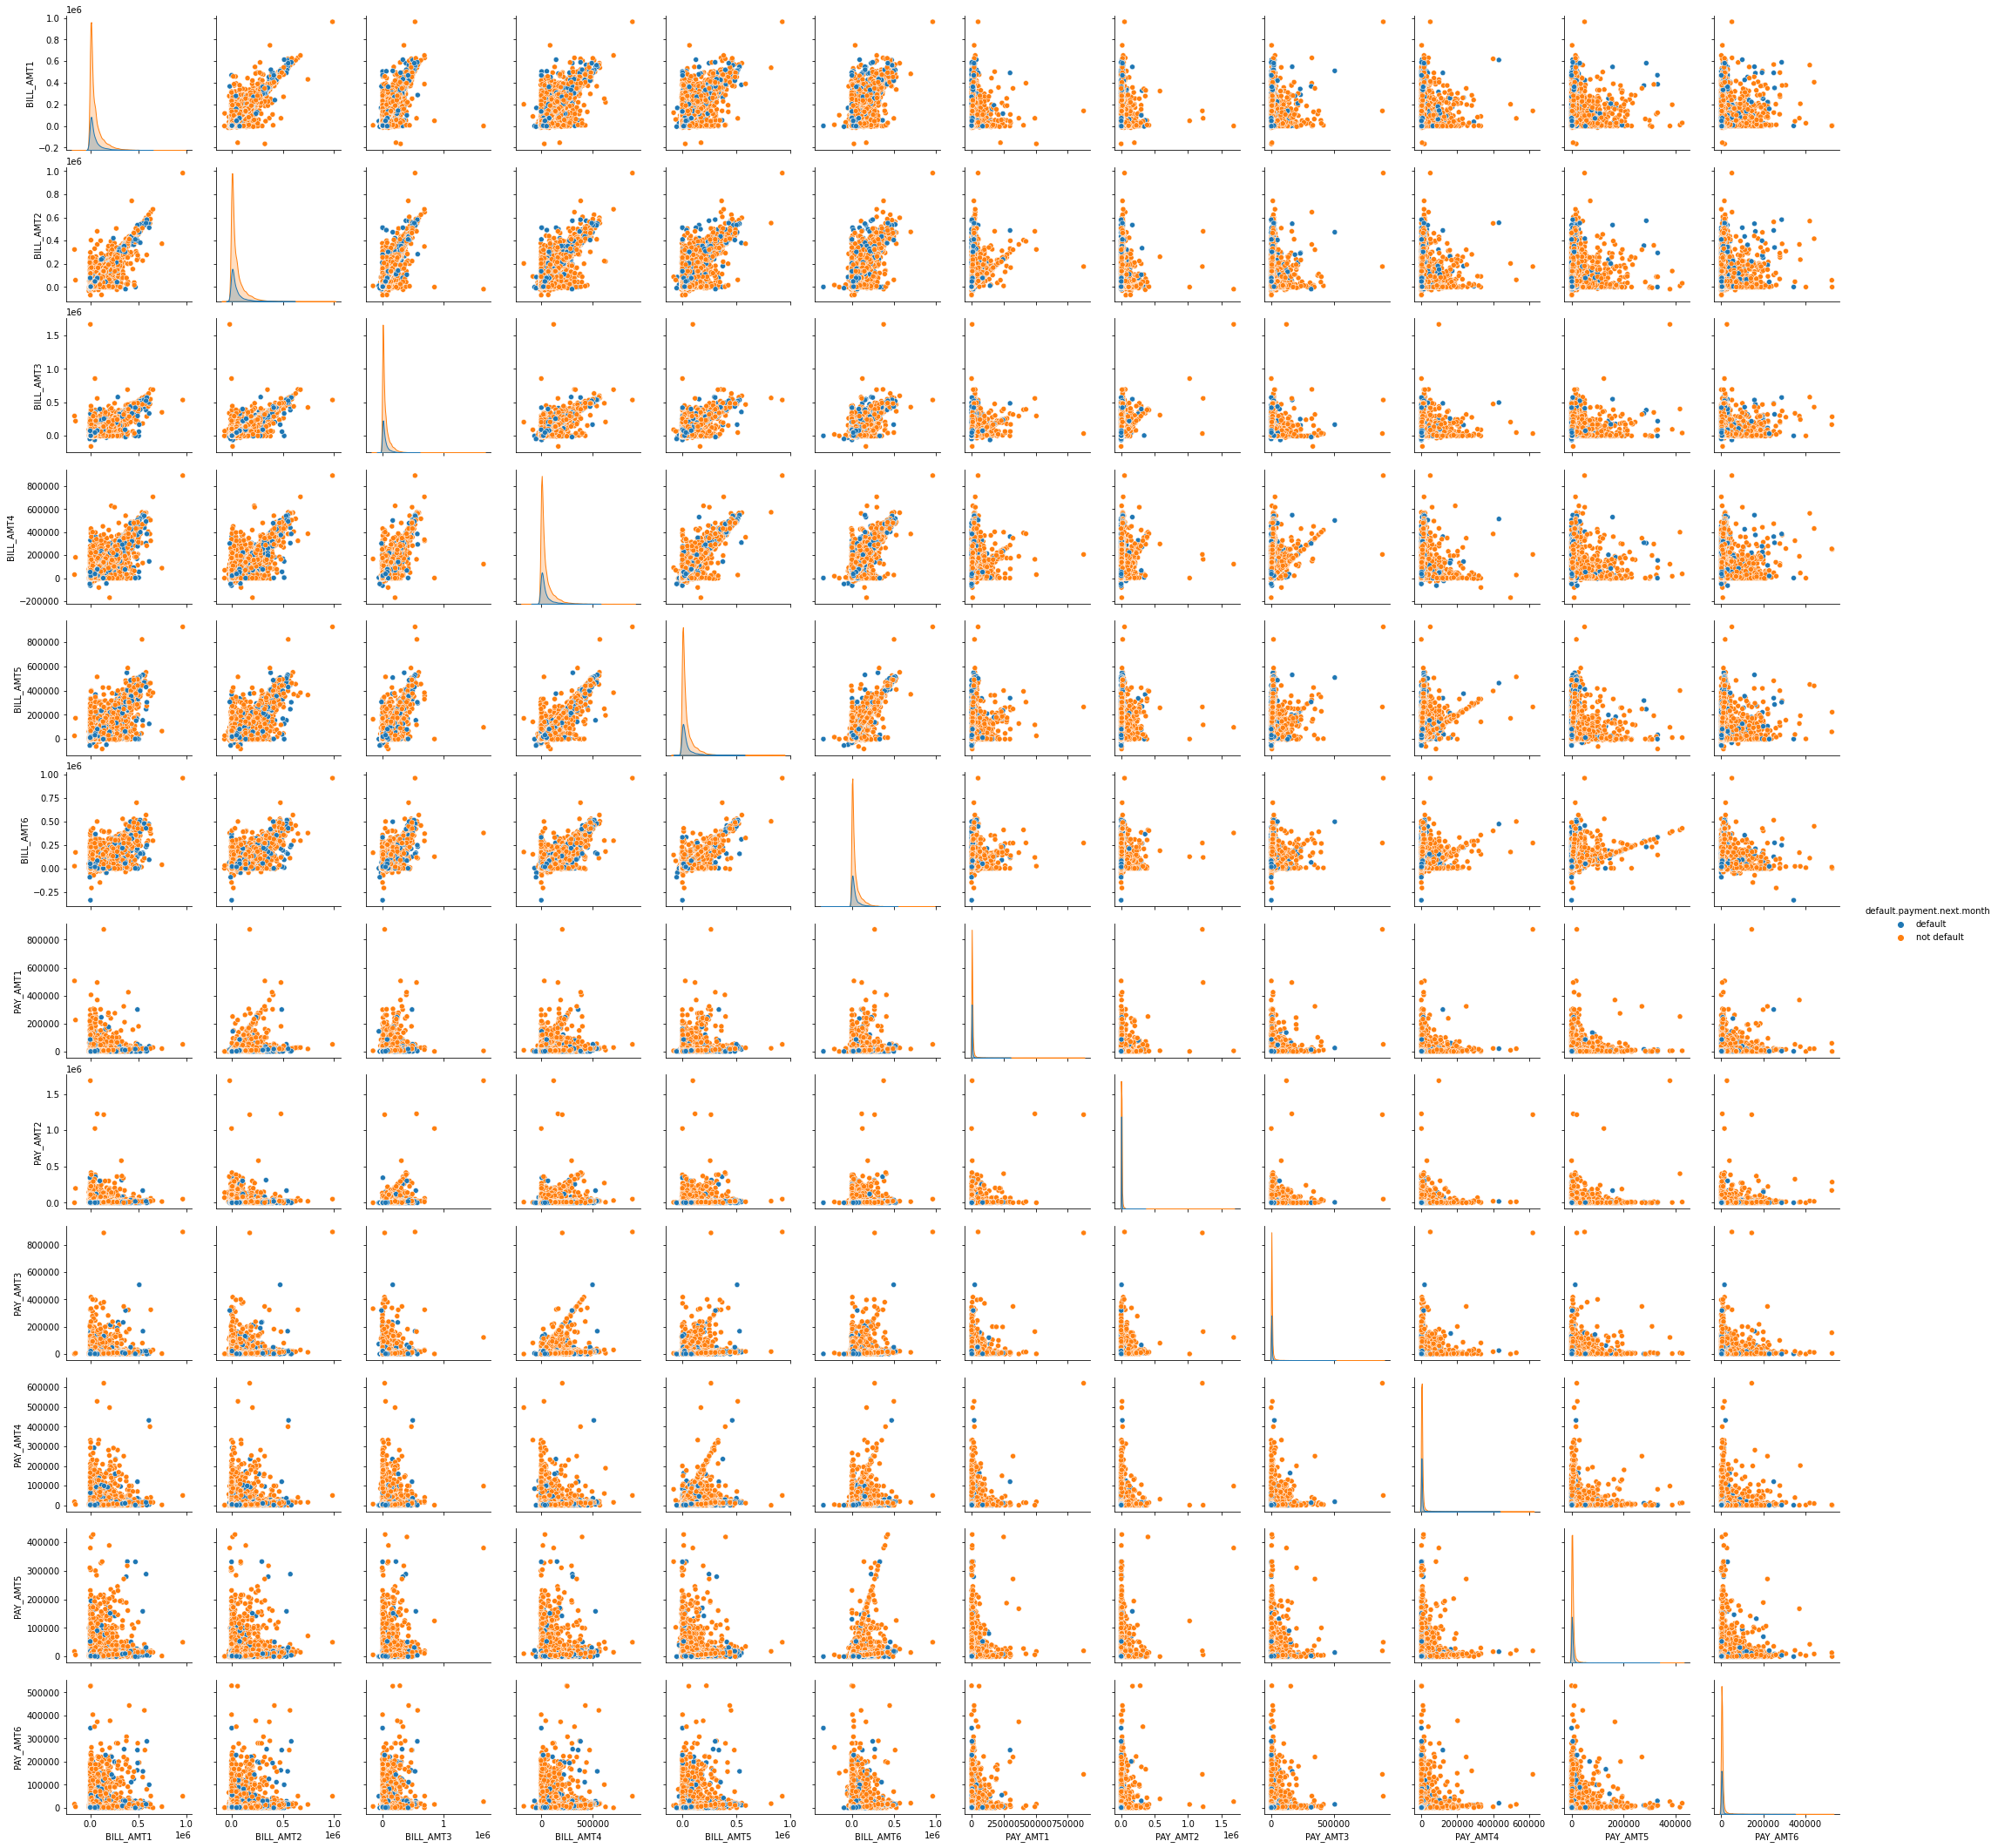

In [284]:
plt.figure(figsize=(25,25))
sns.pairplot(df1,vars=df1.columns[12:24],hue='default.payment.next.month')

## MODEL BUILDING AND EVALUATION

In [27]:
df2=df.copy()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_1                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [28]:
df2[['SEX','MARRIAGE','EDUCATION','PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']] = df[['SEX','MARRIAGE','EDUCATION','PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].astype('object')
df2=pd.get_dummies(df2,columns=['SEX', 'EDUCATION', 'MARRIAGE','PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])
df2.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,SEX_1,SEX_2,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,PAY_1_0,PAY_1_1,PAY_1_2,PAY_1_3,PAY_1_4,PAY_1_5,PAY_1_6,PAY_1_7,PAY_1_8,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_0,PAY_4_1,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,1,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,3,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,4,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,5,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [29]:
df2.drop(columns='ID',inplace=True)

In [30]:
X=df2.drop(columns='default.payment.next.month')

In [31]:
y=df2['default.payment.next.month']

In [32]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [33]:
X_std=std.fit_transform(X)

In [34]:
X=pd.DataFrame(X_std,columns=X.columns)

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

## LOGISTIC REGRESSION

In [36]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [37]:
lg.fit(X_train,y_train)

C:\Users\ATHIRA S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
y_pred=lg.predict(X_test)
y_pred_prob=lg.predict_proba(X_test)

In [39]:
from sklearn.metrics import accuracy_score,roc_auc_score,classification_report,confusion_matrix


In [59]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix

def evaluate_classification(y_true, y_pred):
    results = {}
    results['accuracy'] = accuracy_score(y_true, y_pred)
    results['f1 score'] = f1_score(y_true, y_pred)
    results['Precision'] = precision_score(y_true, y_pred)
    results['recall'] =recall_score(y_true, y_pred)
    results['classification_report'] = print(classification_report(y_true, y_pred))
    results['confusion_matrix'] = sns.heatmap(confusion_matrix(y_true, y_pred),annot=True,fmt='d')

    return results


              precision    recall  f1-score   support

           0       0.84      0.96      0.89      4687
           1       0.69      0.36      0.47      1313

    accuracy                           0.82      6000
   macro avg       0.77      0.66      0.68      6000
weighted avg       0.81      0.82      0.80      6000



{'accuracy': 0.824,
 'f1 score': 0.46934673366834173,
 'Precision': 0.689807976366322,
 'recall': 0.3556740289413557,
 'classification_report': None,
 'confusion_matrix': <AxesSubplot:>}

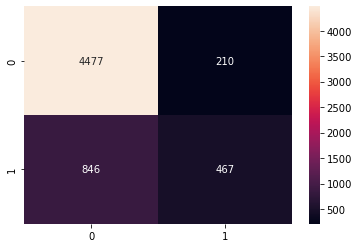

In [60]:
evaluate_classification(y_test,y_pred)

In [54]:
from sklearn.metrics import roc_auc_score
y_pred_prob_positive_class = y_pred_prob[:, 1] 
roc_auc = roc_auc_score(y_test, y_pred_prob_positive_class)
print(f"AUC-ROC Score: {roc_auc:.4f}")


AUC-ROC Score: 0.7628


In [72]:
from sklearn.model_selection import GridSearchCV

In [139]:
lg1=LogisticRegression()

In [76]:
param_grid={'C':[0.001,0.01,0.1,1,10],'solver':['liblinear','lbfgs','newton-cg']}

In [141]:
grid_search=GridSearchCV(lg1,param_grid,cv=5,scoring='roc_auc')
grid_search.fit(X_train,y_train)

C:\Users\ATHIRA S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ATHIRA S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg']},
             scoring='roc_auc')

In [142]:
best_param=grid_search.best_params_
best_param

{'C': 0.001, 'solver': 'liblinear'}

In [61]:
best_param={'C': 0.001, 'solver': 'liblinear'}

In [62]:
log=LogisticRegression(**best_param)

In [63]:
log.fit(X_train,y_train)

LogisticRegression(C=0.001, solver='liblinear')

In [64]:
y_best=log.predict(X_test)
y_best_prob=log.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.85      0.95      0.89      4687
           1       0.67      0.38      0.49      1313

    accuracy                           0.82      6000
   macro avg       0.76      0.67      0.69      6000
weighted avg       0.81      0.82      0.80      6000



{'accuracy': 0.8236666666666667,
 'f1 score': 0.48839458413926495,
 'Precision': 0.6688741721854304,
 'recall': 0.38461538461538464,
 'classification_report': None,
 'confusion_matrix': <AxesSubplot:>}

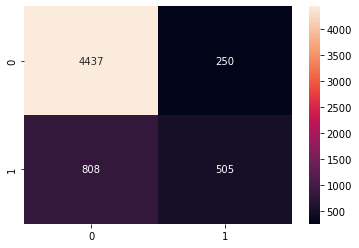

In [65]:
evaluate_classification(y_test,y_best)

In [66]:
y_pred_prob_positive_class = y_best_prob[:, 1] 
roc_auc = roc_auc_score(y_test, y_pred_prob_positive_class)
print(f"AUC-ROC Score: {roc_auc:.4f}")


AUC-ROC Score: 0.7659


### SMOTE

##### SMOTE (Synthetic Minority Over-sampling Technique) is a popular technique for addressing the class imbalance problem in machine learning. It works by generating synthetic examples for the minority class, thereby balancing the class distribution

In [94]:
from imblearn.over_sampling import SMOTE

In [95]:
sm=SMOTE(random_state=58)

In [96]:
X_train_resampled,y_train_resampled=sm.fit_resample(X_train,y_train)

In [97]:
X_train_resampled.shape

(37354, 75)

In [98]:
lg1=LogisticRegression()

In [99]:
grid_search=GridSearchCV(lg1,param_grid,cv=5,scoring='roc_auc')
grid_search.fit(X_train_resampled,y_train_resampled)

C:\Users\ATHIRA S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ATHIRA S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg']},
             scoring='roc_auc')

In [100]:
model_best=grid_search.best_params_

In [101]:
model=LogisticRegression(**model_best)

In [102]:
model.fit(X_train_resampled,y_train_resampled)

C:\Users\ATHIRA S\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=10)

In [103]:
y_pred_=model.predict(X_test)
y_pred_prob_=model.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4687
           1       0.50      0.57      0.53      1313

    accuracy                           0.78      6000
   macro avg       0.69      0.70      0.70      6000
weighted avg       0.79      0.78      0.79      6000



{'accuracy': 0.7828333333333334,
 'f1 score': 0.5324721923214927,
 'Precision': 0.5033921302578019,
 'recall': 0.5651180502665651,
 'classification_report': None,
 'confusion_matrix': <AxesSubplot:>}

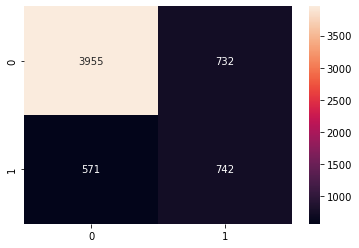

In [104]:
evaluate_classification(y_test,y_pred_)

In [106]:
y_pred_prob_positive_class = y_pred_prob_[:, 1] 
roc_auc = roc_auc_score(y_true, y_pred_prob_positive_class)
print(f"AUC-ROC Score: {roc_auc:.4f}")


AUC-ROC Score: 0.7626


## Random Forest

In [107]:
from sklearn.ensemble import RandomForestClassifier

In [108]:
rf=RandomForestClassifier(random_state=45,n_estimators=200,max_depth=10,min_samples_split=2,min_samples_leaf=4)

In [109]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=200,
                       random_state=45)

In [110]:
rf_pred=rf.predict(X_test)
rf_pred_prob=rf.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.84      0.95      0.90      4687
           1       0.69      0.37      0.48      1313

    accuracy                           0.83      6000
   macro avg       0.77      0.66      0.69      6000
weighted avg       0.81      0.83      0.81      6000



{'accuracy': 0.8263333333333334,
 'f1 score': 0.48313492063492064,
 'Precision': 0.6927453769559033,
 'recall': 0.3709063214013709,
 'classification_report': None,
 'confusion_matrix': <AxesSubplot:>}

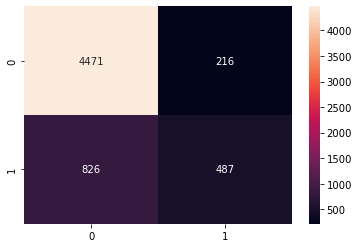

In [111]:
evaluate_classification(y_test,rf_pred)

In [112]:
y_pred_prob_positive_class =rf_pred_prob[:, 1] 
roc_auc = roc_auc_score(y_true, y_pred_prob_positive_class)
print(f"AUC-ROC Score: {roc_auc:.4f}")


AUC-ROC Score: 0.7757


### SMOTE

In [113]:
param_rf = {'n_estimators': [50, 100],  'max_depth': [None, 10, 20, 30],  'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [114]:
rf2=RandomForestClassifier()

In [115]:
grid_rf=GridSearchCV(rf2,param_rf,cv=5)
grid_rf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100]})

In [116]:
best_rf=grid_rf.best_params_

In [117]:
best_rf

{'max_depth': 10,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [119]:
rf2=RandomForestClassifier(**best_rf)

In [120]:
rf2.fit(X_train_resampled,y_train_resampled)

RandomForestClassifier(max_depth=10, min_samples_leaf=2)

In [125]:
rf2_pred=rf2.predict(X_test)
rf2_pred_prob=rf2.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.88      0.83      0.85      4687
           1       0.49      0.58      0.53      1313

    accuracy                           0.78      6000
   macro avg       0.68      0.71      0.69      6000
weighted avg       0.79      0.78      0.78      6000



{'accuracy': 0.7756666666666666,
 'f1 score': 0.5310104529616725,
 'Precision': 0.48940269749518306,
 'recall': 0.5803503427265804,
 'classification_report': None,
 'confusion_matrix': <AxesSubplot:>}

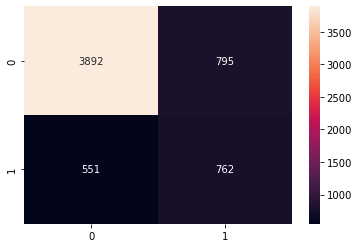

In [126]:
evaluate_classification(y_test,rf2_pred)

In [127]:
y_pred_prob_positive_class =rf2_pred_prob[:, 1] 
roc_auc = roc_auc_score(y_true, y_pred_prob_positive_class)
print(f"AUC-ROC Score: {roc_auc:.4f}")


AUC-ROC Score: 0.7714


## XGBOOST

In [128]:
import xgboost as xgb

In [129]:
xgb_model=xgb.XGBClassifier()

In [130]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [131]:
xgb_pred=xgb_model.predict(X_test)
xgb_pred_prob=xgb_model.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      4687
           1       0.66      0.38      0.48      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.66      0.69      6000
weighted avg       0.80      0.82      0.80      6000



{'accuracy': 0.8206666666666667,
 'f1 score': 0.4811957569913211,
 'Precision': 0.6557161629434954,
 'recall': 0.38004569687738005,
 'classification_report': None,
 'confusion_matrix': <AxesSubplot:>}

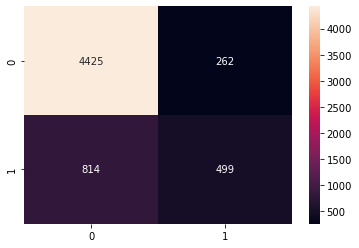

In [132]:
evaluate_classification(y_test,xgb_pred)

In [133]:
y_pred_prob_positive_class =xgb_pred_prob[:, 1] 
roc_auc = roc_auc_score(y_true, y_pred_prob_positive_class)
print(f"AUC-ROC Score: {roc_auc:.4f}")


AUC-ROC Score: 0.7609


In [134]:
xg=xgb.XGBClassifier()

In [135]:
para={'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]}

In [136]:
grid=GridSearchCV(xg,para,scoring='roc_auc',cv=5)

In [137]:
grid.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='roc_auc')

In [138]:
best_xgb_para=grid.best_params_
best_xgb_para

{'colsample_bytree': 1.0,
 'learning_rate': 0.01,
 'max_depth': 7,
 'min_child_weight': 5,
 'n_estimators': 300,
 'subsample': 0.8}

In [139]:
best_xgb_model=xgb.XGBClassifier(**best_xgb_para)

In [140]:
best_xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [141]:
pred=best_xgb_model.predict(X_test)
prob=best_xgb_model.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      4687
           1       0.70      0.37      0.48      1313

    accuracy                           0.83      6000
   macro avg       0.77      0.66      0.69      6000
weighted avg       0.81      0.83      0.81      6000



{'accuracy': 0.8271666666666667,
 'f1 score': 0.4812406203101551,
 'Precision': 0.7011661807580175,
 'recall': 0.36633663366336633,
 'classification_report': None,
 'confusion_matrix': <AxesSubplot:>}

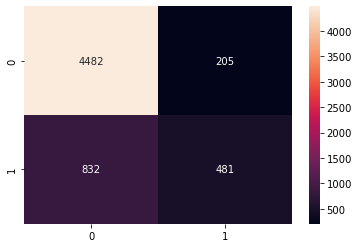

In [142]:
evaluate_classification(y_test,pred)

In [143]:
y_pred_prob_positive_class =prob[:, 1] 
roc_auc = roc_auc_score(y_true, y_pred_prob_positive_class)
print(f"AUC-ROC Score: {roc_auc:.4f}")


AUC-ROC Score: 0.7813


### SMOTE

In [144]:
xgb_model1=xgb.XGBClassifier(**best_xgb_para)
xgb_model1.fit(X_train_resampled,y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [145]:
xgb_pred1=xgb_model1.predict(X_test)
xgb_prob1=xgb_model1.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      4687
           1       0.49      0.55      0.52      1313

    accuracy                           0.78      6000
   macro avg       0.68      0.70      0.69      6000
weighted avg       0.79      0.78      0.78      6000



{'accuracy': 0.7776666666666666,
 'f1 score': 0.5208333333333334,
 'Precision': 0.4928619986403807,
 'recall': 0.5521706016755522,
 'classification_report': None,
 'confusion_matrix': <AxesSubplot:>}

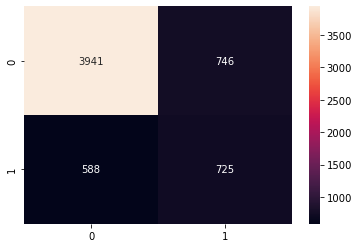

In [146]:
evaluate_classification(y_test,xgb_pred1)

In [147]:
y_pred_prob_positive_class =xgb_prob1[:, 1] 
roc_auc = roc_auc_score(y_true, y_pred_prob_positive_class)
print(f"AUC-ROC Score: {roc_auc:.4f}")


AUC-ROC Score: 0.7682


## AdaBoost

In [154]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [155]:
base_classifier = DecisionTreeClassifier(max_depth=1) 
adaboost_classifier = AdaBoostClassifier(base_classifier, n_estimators=50, random_state=42)


In [156]:
adaboost_classifier.fit(X_train_resampled, y_train_resampled)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [157]:
ada_pred = adaboost_classifier.predict(X_test)
ada_prob=adaboost_classifier.predict_proba(X_test)

              precision    recall  f1-score   support

           0       0.87      0.81      0.84      4687
           1       0.46      0.58      0.51      1313

    accuracy                           0.76      6000
   macro avg       0.67      0.69      0.68      6000
weighted avg       0.78      0.76      0.77      6000



{'accuracy': 0.7595,
 'f1 score': 0.5126646403242148,
 'Precision': 0.46055825242718446,
 'recall': 0.5780654988575781,
 'classification_report': None,
 'confusion_matrix': <AxesSubplot:>}

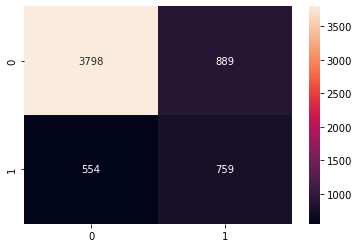

In [158]:
evaluate_classification(y_test,ada_pred)

In [159]:
y_pred_prob_positive_class =ada_prob[:, 1] 
roc_auc = roc_auc_score(y_true, y_pred_prob_positive_class)
print(f"AUC-ROC Score: {roc_auc:.4f}")


AUC-ROC Score: 0.7538


In [3]:
import pandas as pd

## Model Comparison

In [7]:
data = {
    'Model': ['Logistic Regression', 'Logistic Regression(Resampled)', 'Random Forest', 'Random Forest(Resampled)', 'XgBoost', 'XgBoost(Resampled)', 'AdaBoost(Resampled)'],
    'Accuracy': [0.823,0.782,0.826,0.775,0.827,0.777,0.7595],
    'F1 score':[0.488,0.532,0.483,0.531,0.481,0.520,0.513],
    'Precision':[0.668,0.50,0.692,0.489,0.7011,0.492,0.460],
    'recall':[0.384,0.565,0.37,0.580,0.366,0.552,0.578],
    'roc_auc': [0.765,0.7626,0.7757,0.771,0.781,0.768,0.7538]
}
result=pd.DataFrame(data)
result.sort_values(by=['roc_auc','recall'],ascending=False).reset_index(drop=True)

,Model,Accuracy,F1 score,Precision,recall,roc_auc
0,XgBoost,0.8270,0.481,0.7011,0.366,0.7810
1,Random Forest,0.8260,0.483,0.6920,0.370,0.7757
2,Random Forest(Resampled),0.7750,0.531,0.4890,0.580,0.7710
3,XgBoost(Resampled),0.7770,0.520,0.4920,0.552,0.7680
4,Logistic Regression,0.8230,0.488,0.6680,0.384,0.7650
5,Logistic Regression(Resampled),0.7820,0.532,0.5000,0.565,0.7626
6,AdaBoost(Resampled),0.7595,0.513,0.4600,0.578,0.7538
